In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [14]:
dataset_path = r'C:\Users\prodi\Documents\Machine Learning Repository\Machine-Learning-Course\Sigmoid\HousingData.csv'
df = pd.read_csv(dataset_path)

In [30]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [31]:
df = df.dropna()
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [34]:
X =df.drop("MEDV", axis=1).values  #features
Y= df["MEDV"].values               #target

In [35]:
Room_number = X[:,5]                              # get the RM features from the dataset
Room_number = Room_number.reshape(-1,1)           # split array into individual data
Y=Y.reshape(-1,1)

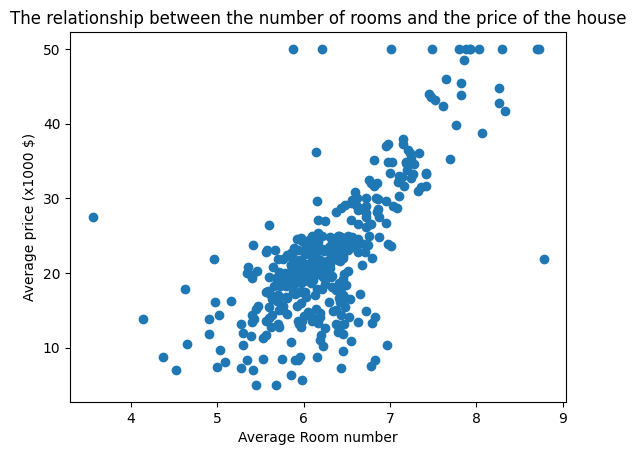

In [36]:
plt.scatter(Room_number,Y, )

plt.xlabel("Average Room number")
plt.ylabel("Average price (x1000 $)")
plt.title("The relationship between the number of rooms and the price of the house")
plt.show()

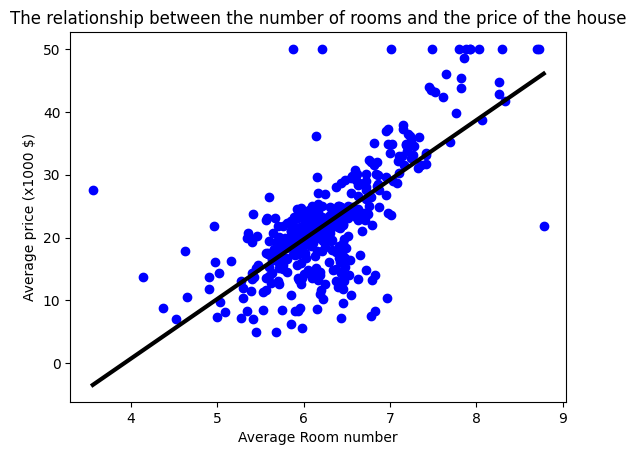

In [38]:
#Regression model

from sklearn.linear_model import LinearRegression

regression = LinearRegression()

regression.fit(Room_number,Y) 

regression_line = np.linspace(min(Room_number), max(Room_number)) 

plt.scatter(Room_number,Y, color="blue")

plt.xlabel("Average Room number")
plt.ylabel("Average price (x1000 $)")
plt.title("The relationship between the number of rooms and the price of the house")

plt.plot(regression_line, regression.predict(regression_line), color="black", linewidth = 3)
plt.show()

In [39]:
#Linear Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, Y_train, Y_test =train_test_split (X,Y, test_size=0.2, random_state=30)

regression_all = LinearRegression()
regression_all.fit(X_train, Y_train)
Y_prediction = regression_all.predict(X_test)
print ("R^2: {}" .format(regression_all.score(X_test, Y_test)))

R^2: 0.7524343714963602


In [40]:
#mean_squared_error

from sklearn.metrics import mean_squared_error

Y_prediction = regression_all.predict(X_test)
error = np.sqrt(mean_squared_error(Y_test, Y_prediction))

print ("error: {}".format(error))

error: 4.598289352889994


In [41]:
# Implement from-scratch linear regression
class LinearRegressionFromScratch:
    def __init__(self):
        self.weights = None
        self.bias = None

    def fit(self, X, y, learning_rate=0.01, num_iterations=1000):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(num_iterations):
            y_pred = self.predict(X)
            d_weights = (1 / num_samples) * np.dot(X.T, (y_pred - y))
            d_bias = (1 / num_samples) * np.sum(y_pred - y)

            self.weights -= learning_rate * d_weights
            self.bias -= learning_rate * d_bias

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


In [43]:
# Train a from-scratch linear regression model
from_scratch_regression = LinearRegressionFromScratch()
from_scratch_regression.fit(X_train, Y_train)

ValueError: operands could not be broadcast together with shapes (13,) (13,315) (13,) 